#Visualizations for Healthcare

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objs as go
import numpy as np
import seaborn as sns

In [ ]:
android = pd.read_csv('/content/Health-Android-Reviews-Sentiments.csv',index_col=0)
IOS = pd.read_csv('/content/Health-IOS-Reviews-Sentiments.csv',index_col=0)
# android = pd.read_csv("Android-.csv")
# IOS = pd.read_csv("ios-csv-merged.csv")
#IOS = pd.read_csv("ios-csv-merged.csv", dtype={'isEdited': str, 'reviewId': str, 'userImage': str, 'content':str,  'score': str, 'reviewCreatedVersion': str, 'at': str, 'replyContent': str, 'repliedAt': str})


#Comparison of apps which have a developer response in iOS and Android

In [ ]:
android['year'] = android['at'].str.slice(0,4)
IOS['year'] = IOS['date'].str.slice(0,4)
android['hasResponse'] = ~android['replyContent'].isnull()
IOS['hasResponse'] = ~IOS['developerResponse'].isnull()

In [ ]:
android_response = android.groupby(['score','hasResponse']).size().reset_index(name="counts")
IOS_response = IOS.groupby(['rating','hasResponse']).size().reset_index(name="counts")

In [ ]:
android_response['Android'] = (android_response['counts'] * 100)/android_response.groupby('score')['counts'].transform('sum')
IOS_response['iOS'] = (IOS_response['counts'] * 100)/IOS_response.groupby('rating')['counts'].transform('sum')

In [ ]:
android_response = android_response.rename(columns={'score':'rating'})
android_response.drop('counts',axis=1,inplace=True)
IOS_response.drop('counts',axis=1,inplace=True)

In [ ]:
IOS_response

,rating,hasResponse,iOS
0,1,False,18.018018
1,1,True,81.981982
2,2,False,29.166667
3,2,True,70.833333
4,3,False,30.851064
5,3,True,69.148936
6,4,False,44.736842
7,4,True,55.263158
8,5,False,80.026455
9,5,True,19.973545


In [ ]:
merged = pd.merge(android_response,IOS_response, on = ['rating','hasResponse'])
merged = merged[merged.hasResponse == True]
merged

,rating,hasResponse,Android,iOS
1,1,True,83.109920,81.981982
3,2,True,90.972222,70.833333
5,3,True,59.285714,69.148936
7,4,True,34.615385,55.263158
9,5,True,8.555400,19.973545


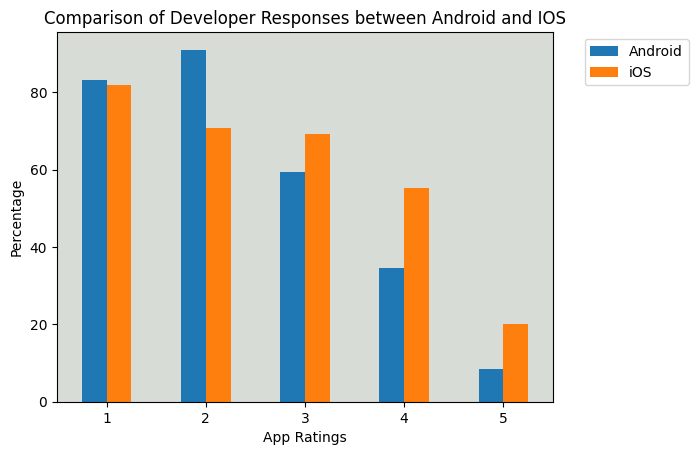

In [ ]:
ax = merged.plot(kind='bar', x='rating', rot=0)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("App Ratings")
plt.ylabel("Percentage")
ax.set_facecolor('xkcd:light gray')
plt.title("Comparison of Developer Responses between Android and IOS")
plt.show()

#Wordcloud

For Android

In [ ]:
#dropping nan values and making sure all content is a string

android['content'].dropna(inplace = True)
android['content'] = android['content'].astype(str)

In [ ]:
#joining text and creating the word cloud
text = " ".join(android.content)
text = text.replace('app', '')
stopwords= set(STOPWORDS)
word_cloud = WordCloud(collocations = False, background_color = 'white', min_word_length = 3, stopwords=stopwords).generate(text)

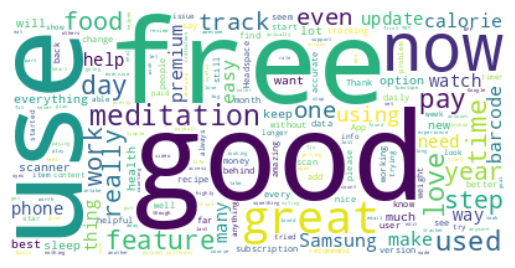

In [ ]:
#plotting the word cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Wordcloud

For iOS

#Comparison of apps which have a developer response in iOS and Android

In [ ]:
android['year'] = android['at'].str.slice(0,4)
IOS['year'] = IOS['date'].str.slice(0,4)
android['hasResponse'] = ~android['replyContent'].isnull()
IOS['hasResponse'] = ~IOS['developerResponse'].isnull()

In [ ]:
android_response = android.groupby(['score','hasResponse']).size().reset_index(name="counts")
IOS_response = IOS.groupby(['rating','hasResponse']).size().reset_index(name="counts")

In [ ]:
android_response['Android'] = (android_response['counts'] * 100)/android_response.groupby('score')['counts'].transform('sum')
IOS_response['iOS'] = (IOS_response['counts'] * 100)/IOS_response.groupby('rating')['counts'].transform('sum')

In [ ]:
android_response = android_response.rename(columns={'score':'rating'})
android_response.drop('counts',axis=1,inplace=True)
IOS_response.drop('counts',axis=1,inplace=True)

In [ ]:
IOS_response

,rating,hasResponse,iOS
0,1,False,18.018018
1,1,True,81.981982
2,2,False,29.166667
3,2,True,70.833333
4,3,False,30.851064
5,3,True,69.148936
6,4,False,44.736842
7,4,True,55.263158
8,5,False,80.026455
9,5,True,19.973545


In [ ]:
merged = pd.merge(android_response,IOS_response, on = ['rating','hasResponse'])
merged = merged[merged.hasResponse == True]
merged

,rating,hasResponse,Android,iOS
1,1,True,83.109920,81.981982
3,2,True,90.972222,70.833333
5,3,True,59.285714,69.148936
7,4,True,34.615385,55.263158
9,5,True,8.555400,19.973545


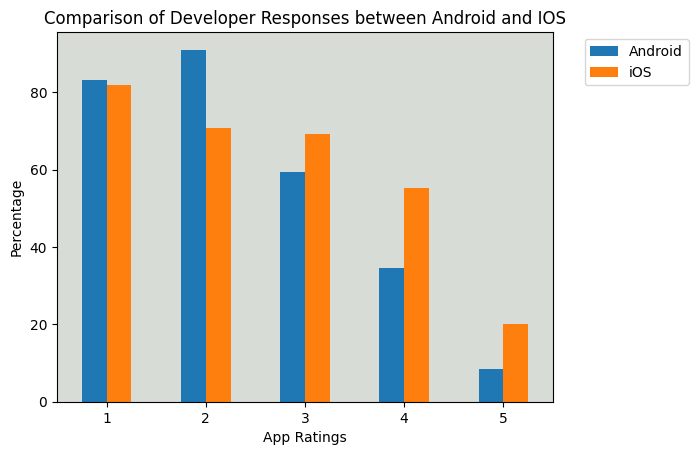

In [ ]:
ax = merged.plot(kind='bar', x='rating', rot=0)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("App Ratings")
plt.ylabel("Percentage")
ax.set_facecolor('xkcd:light gray')
plt.title("Comparison of Developer Responses between Android and IOS")
plt.show()

In [ ]:
IOS['review'].dropna(inplace = True)
IOS['review'] = IOS['review'].astype(str)

In [ ]:
text = " ".join(IOS.review)
text = text.replace('app', '')
stopwords= set(STOPWORDS)
word_cloud = WordCloud(collocations = False, background_color = 'white', min_word_length = 3, stopwords=stopwords).generate(text)

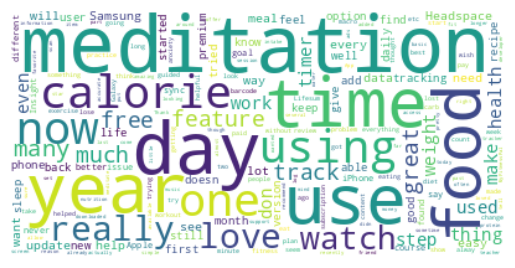

In [ ]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Sentiment analysis over time

For Android 

In [ ]:
android['at'] = pd.to_datetime(android['at']) #convert 'at' to datetime format

In [ ]:
android_date_sentiment = android.groupby([pd.Grouper(key='at', freq='D'), 'Sentiment BERT Standard']).size().reset_index(name='count')

In [ ]:
android_pivot = android_date_sentiment.pivot(index='at', columns='Sentiment BERT Standard', values='count')

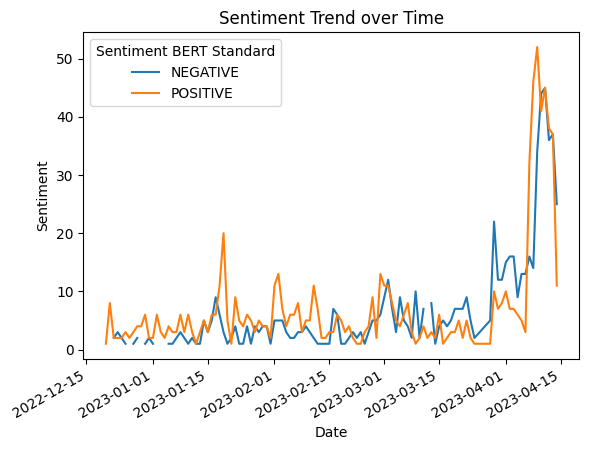

In [ ]:
android_pivot.plot(title='Sentiment Trend over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.show()

#Sentiment analysis over time
For iOS

In [ ]:
IOS['date'] = pd.to_datetime(IOS['date'])

In [ ]:
IOS_date_sentiment = IOS.groupby([pd.Grouper(key='date', freq='D'), 'Sentiment BERT Standard']).size().reset_index(name='count')


In [ ]:
IOS_pivot = IOS_date_sentiment.pivot(index='date', columns='Sentiment BERT Standard', values='count')

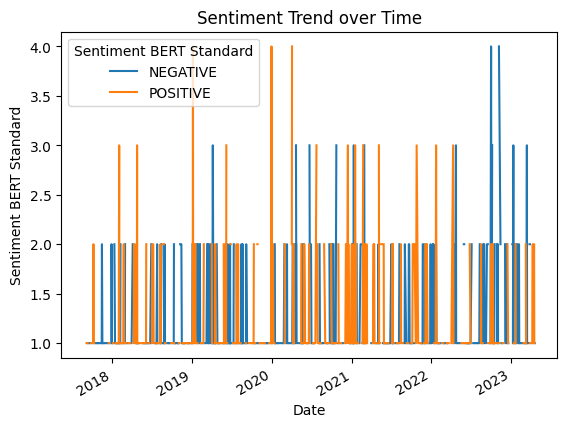

In [ ]:
IOS_pivot.plot(title='Sentiment Trend over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment BERT Standard')
plt.show()

#Sentiment vs score

For Android

In [ ]:
android ['year'] = pd.DatetimeIndex(android ['at']).year
print(android['year'].unique())

[2023 2022]


In [ ]:
for row,i in android.iterrows():
  if i['Sentiment BERT Standard'] == 'NEGATIVE':
   android['score BERT Standard'] = android['score BERT Standard'].replace(android.iloc[row]['score BERT Standard'], -1 * android.iloc[row]['score BERT Standard'])
   

In [ ]:
print(android['score BERT Standard'])

0       0.977099
1      -0.987126
2      -0.997088
3      -0.992163
4      -0.999778
          ...   
1495   -0.969387
1496   -0.998092
1497   -0.997485
1498   -0.998603
1499   -0.999746
Name: score BERT Standard, Length: 1500, dtype: float64


In [ ]:
#android.head(5)

In [ ]:
#android['thumbsUpCount'].unique()


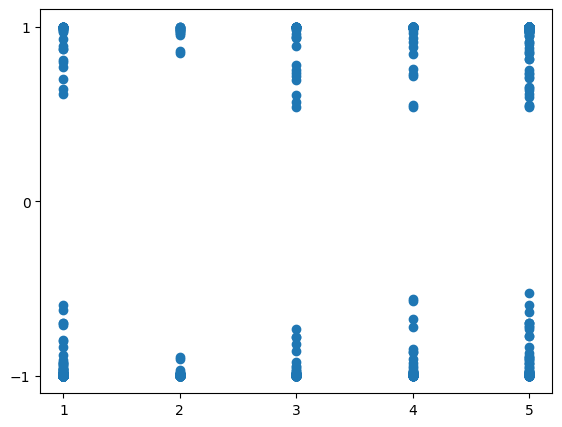

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax.set_xticks([1,2,3,4,5])
ax.set_yticks([-1,0,1])
plt.scatter(android['score'],android['score BERT Standard'])
plt.show()

In [ ]:
# df.loc[df['B'] == 3, 'A']
android.loc[android['score'] == 5, 'score BERT Standard'][:10]

0     0.977099
6     0.974178
7     0.999873
17    0.999852
18    0.999367
19    0.998506
20    0.999853
21   -0.996955
30    0.999814
32    0.999409
Name: score BERT Standard, dtype: float64

#Sentiment vs score
For iOS

In [ ]:
for row,i in IOS.iterrows():
  if i['Sentiment BERT Standard'] == 'NEGATIVE':
   IOS['score BERT Standard'] = IOS['score BERT Standard'].replace(IOS.iloc[row]['score BERT Standard'], -1 * IOS.iloc[row]['score BERT Standard'])
  
  

In [ ]:
#IOS
  

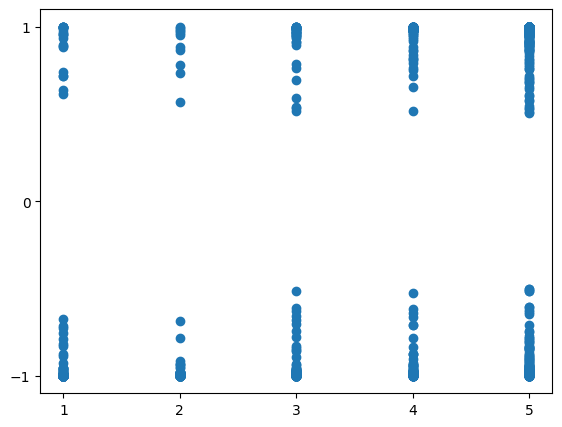

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
ax.set_xticks([1,2,3,4,5])
ax.set_yticks([-1,0,1])
plt.scatter(IOS['rating'],IOS['score BERT Standard'])
plt.show()

#Review length

For Android

In [ ]:
android['content_len'] = android['content'].astype(str).apply(len) 
android['word_count'] = android['content'].apply(lambda x: len(str(x).split()))
#adding the length of the review and the word count of each review.
positive = android[android['Sentiment BERT Standard'] == 'positive']
negative = android[android['Sentiment BERT Standard'] == 'negative']

In [ ]:
# Print first rows of train
android.head()
print(f'{android.shape[0]} observations, {android.shape[1]} columns')

1500 observations, 19 columns


In [ ]:
# Count samples per category
print(android['Sentiment BERT Standard'].value_counts(), "\n")
print(android['Sentiment BERT Standard'].value_counts(normalize=True))

POSITIVE    803
NEGATIVE    697
Name: Sentiment BERT Standard, dtype: int64 

POSITIVE    0.535333
NEGATIVE    0.464667
Name: Sentiment BERT Standard, dtype: float64


In [ ]:

x = android.word_count.values

fig = go.Figure(data=[go.Histogram(x=x,
                                   marker_color="red",
                                   marker_line_width=1, 
                                   marker_line_color="midnightblue", 
                                   xbins_size = 5)])

fig.update_layout( xaxis_title="Words in Review",yaxis_title="Total Reviews",title_text='Distribution of Word Count in Health Category of Android Apps')
fig.show()

#Review length

For IOS

In [ ]:
#adding the length of the review and the word count of each review.
IOS['review_len'] = IOS['review'].astype(str).apply(len) 
IOS['word_count'] = IOS['review'].apply(lambda x: len(str(x).split()))
positive = IOS[IOS['Sentiment BERT Standard'] == 'positive']
negative = IOS[IOS['Sentiment BERT Standard'] == 'negative']

In [ ]:
# Print first rows of IOS
IOS.head()
print(f'{IOS.shape[0]} observations, {IOS.shape[1]} columns')

1500 observations, 16 columns


In [ ]:
# Count samples per category
print(IOS['Sentiment BERT Standard'].value_counts(), "\n")
print(IOS['Sentiment BERT Standard'].value_counts(normalize=True))

NEGATIVE    778
POSITIVE    722
Name: Sentiment BERT Standard, dtype: int64 

NEGATIVE    0.518667
POSITIVE    0.481333
Name: Sentiment BERT Standard, dtype: float64


In [ ]:

x = IOS.word_count.values

fig = go.Figure(data=[go.Histogram(x=x,
                                   marker_color="red",
                                   marker_line_width=1, 
                                   marker_line_color="black", 
                                   xbins_size = 5)])

fig.update_layout( xaxis_title="Words in Review",yaxis_title="Total Reviews",title_text='Distribution of Word Count in Health Category of IOS Apps')
fig.show()

# Difference in ratings 
For Android

In [ ]:
android["Sentiment Review BERT"] #Visualising stars

0       5 stars
1        1 star
2       2 stars
3        1 star
4        1 star
         ...   
1495     1 star
1496    2 stars
1497     1 star
1498     1 star
1499     1 star
Name: Sentiment Review BERT, Length: 1500, dtype: object

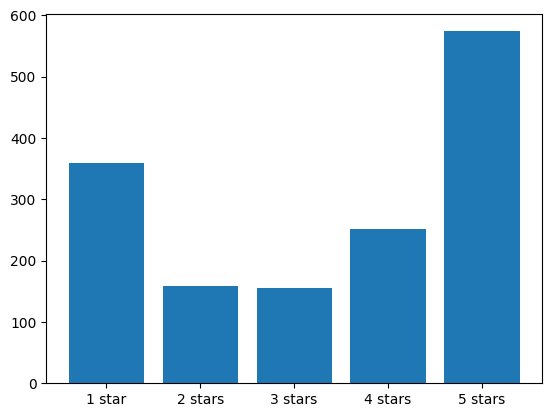

1 star     359
2 stars     159
3 stars     156
4 stars     252
5 stars     574


In [ ]:
#Overall happiness via BERT VS actual Ratings
keys, counts = np.unique(android["Sentiment Review BERT"], return_counts=True)

plt.bar(keys, counts)
plt.show()
for i in range(len(keys)):
  print(keys[i],"   ",counts[i])

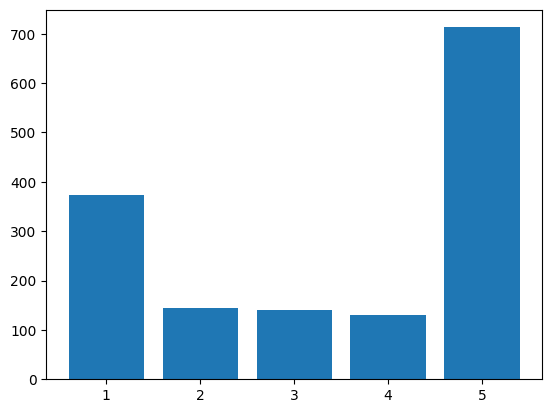

1     373
2     144
3     140
4     130
5     713


In [ ]:
#check actual counts
actualkeys, actualcounts = np.unique(android["score"], return_counts=True)

plt.bar(actualkeys, actualcounts)
plt.show()
for i in range(len(actualkeys)):
  print(actualkeys[i],"   ",actualcounts[i])

In [ ]:
#difference in values is present !
diff=[]
for i in range(len(keys)):
  diff.append(abs(actualcounts[i]-counts[i]))
  print("Difference in ",keys[i],"   ",diff[i])
print()
print("Total diff is", sum(diff))

Difference in  1 star     14
Difference in  2 stars     15
Difference in  3 stars     16
Difference in  4 stars     122
Difference in  5 stars     139

Total diff is 306


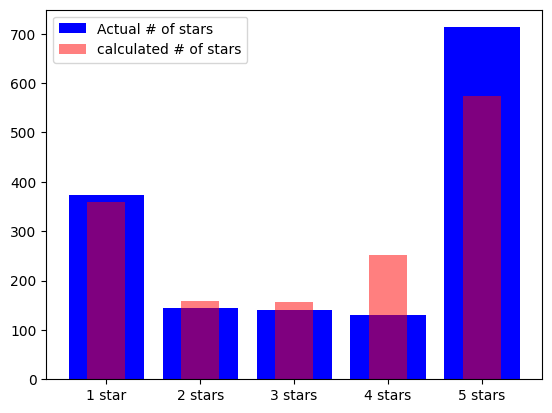

In [ ]:
width = 0.8 #visualise together for android 
plt.bar(keys, actualcounts, width=width, 
        color='b', label='Actual # of stars')
plt.bar(keys, counts, 
        width=0.5*width, color='r', alpha=0.5, label='calculated # of stars')

plt.legend()

plt.show()

#Difference in ratings
For iOS

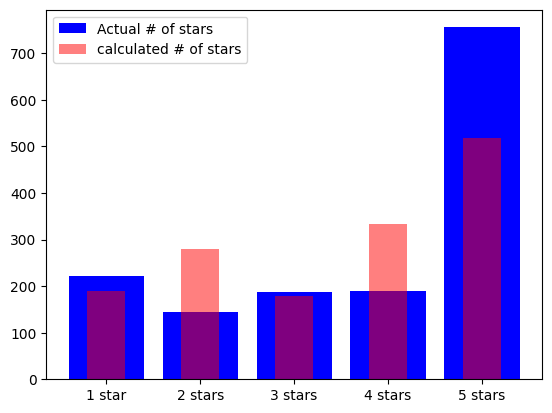

Difference in  1 star     32
Difference in  2 stars     135
Difference in  3 stars     9
Difference in  4 stars     144
Difference in  5 stars     238

Total diff is 558


In [ ]:
# checking if the same is present in IOS
keys, counts = np.unique(IOS["Sentiment Review BERT"], return_counts=True)
actualkeys, actualcounts = np.unique(IOS["rating"], return_counts=True)
width = 0.8 #visualise together for android 
plt.bar(keys, actualcounts, width=width, 
        color='b', label='Actual # of stars')
plt.bar(keys, counts, 
        width=0.5*width, color='r', alpha=0.5, label='calculated # of stars')

plt.legend()

plt.show()
diff=[]
for i in range(len(keys)):
  diff.append(abs(actualcounts[i]-counts[i]))
  print("Difference in ",keys[i],"   ",diff[i])
print()
print("Total diff is", sum(diff))

#Comparison of Android vs IOS scores

Comparing which users are happier.

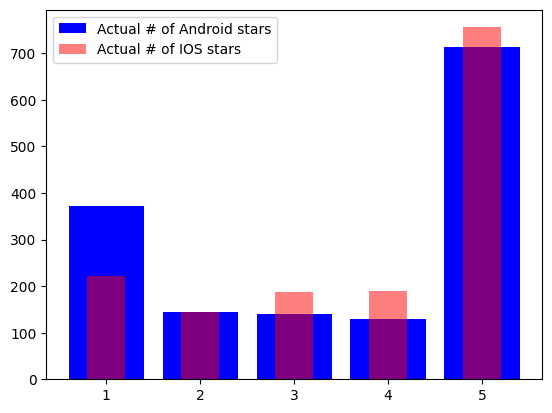

In [ ]:
androidkeys, androidcounts = np.unique(android["score"], return_counts=True)
IOSkeys, IOScounts = np.unique(IOS["rating"], return_counts=True)


width = 0.8 #visualise android vs IOS actual ratings
plt.bar(androidkeys, androidcounts, width=width, 
        color='b', label='Actual # of Android stars')
plt.bar(androidkeys, IOScounts, 
        width=0.5*width, color='r', alpha=0.5, label='Actual # of IOS stars')

plt.legend()

plt.show()

In [ ]:
#There is a diff - but who is happier ?
diff=[]
actualdiff=[]
for i in range(len(androidkeys)):
  diff.append((androidcounts[i]-IOScounts[i]))
  print("Difference in Android and IOS ",keys[i],"   ",diff[i])
  if(i>=2): #if app is above avg greaer number of apps is + otherwise -
     actualdiff.append(diff[i])
  else:
    if(diff[i]>0):
      actualdiff.append(-diff[i])
    else:
      actualdiff.append(abs(diff[i]))

Difference in Android and IOS  1 star     151
Difference in Android and IOS  2 stars     0
Difference in Android and IOS  3 stars     -48
Difference in Android and IOS  4 stars     -60
Difference in Android and IOS  5 stars     -43


In [ ]:
#taking 3 starts as the avg app , here is actual diff
print(actualdiff)
print("Total diff is", sum(actualdiff))

[-151, 0, -48, -60, -43]
Total diff is -302


# Correlation Plots 
Drawing correlations among all numeric columns for Android applications

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



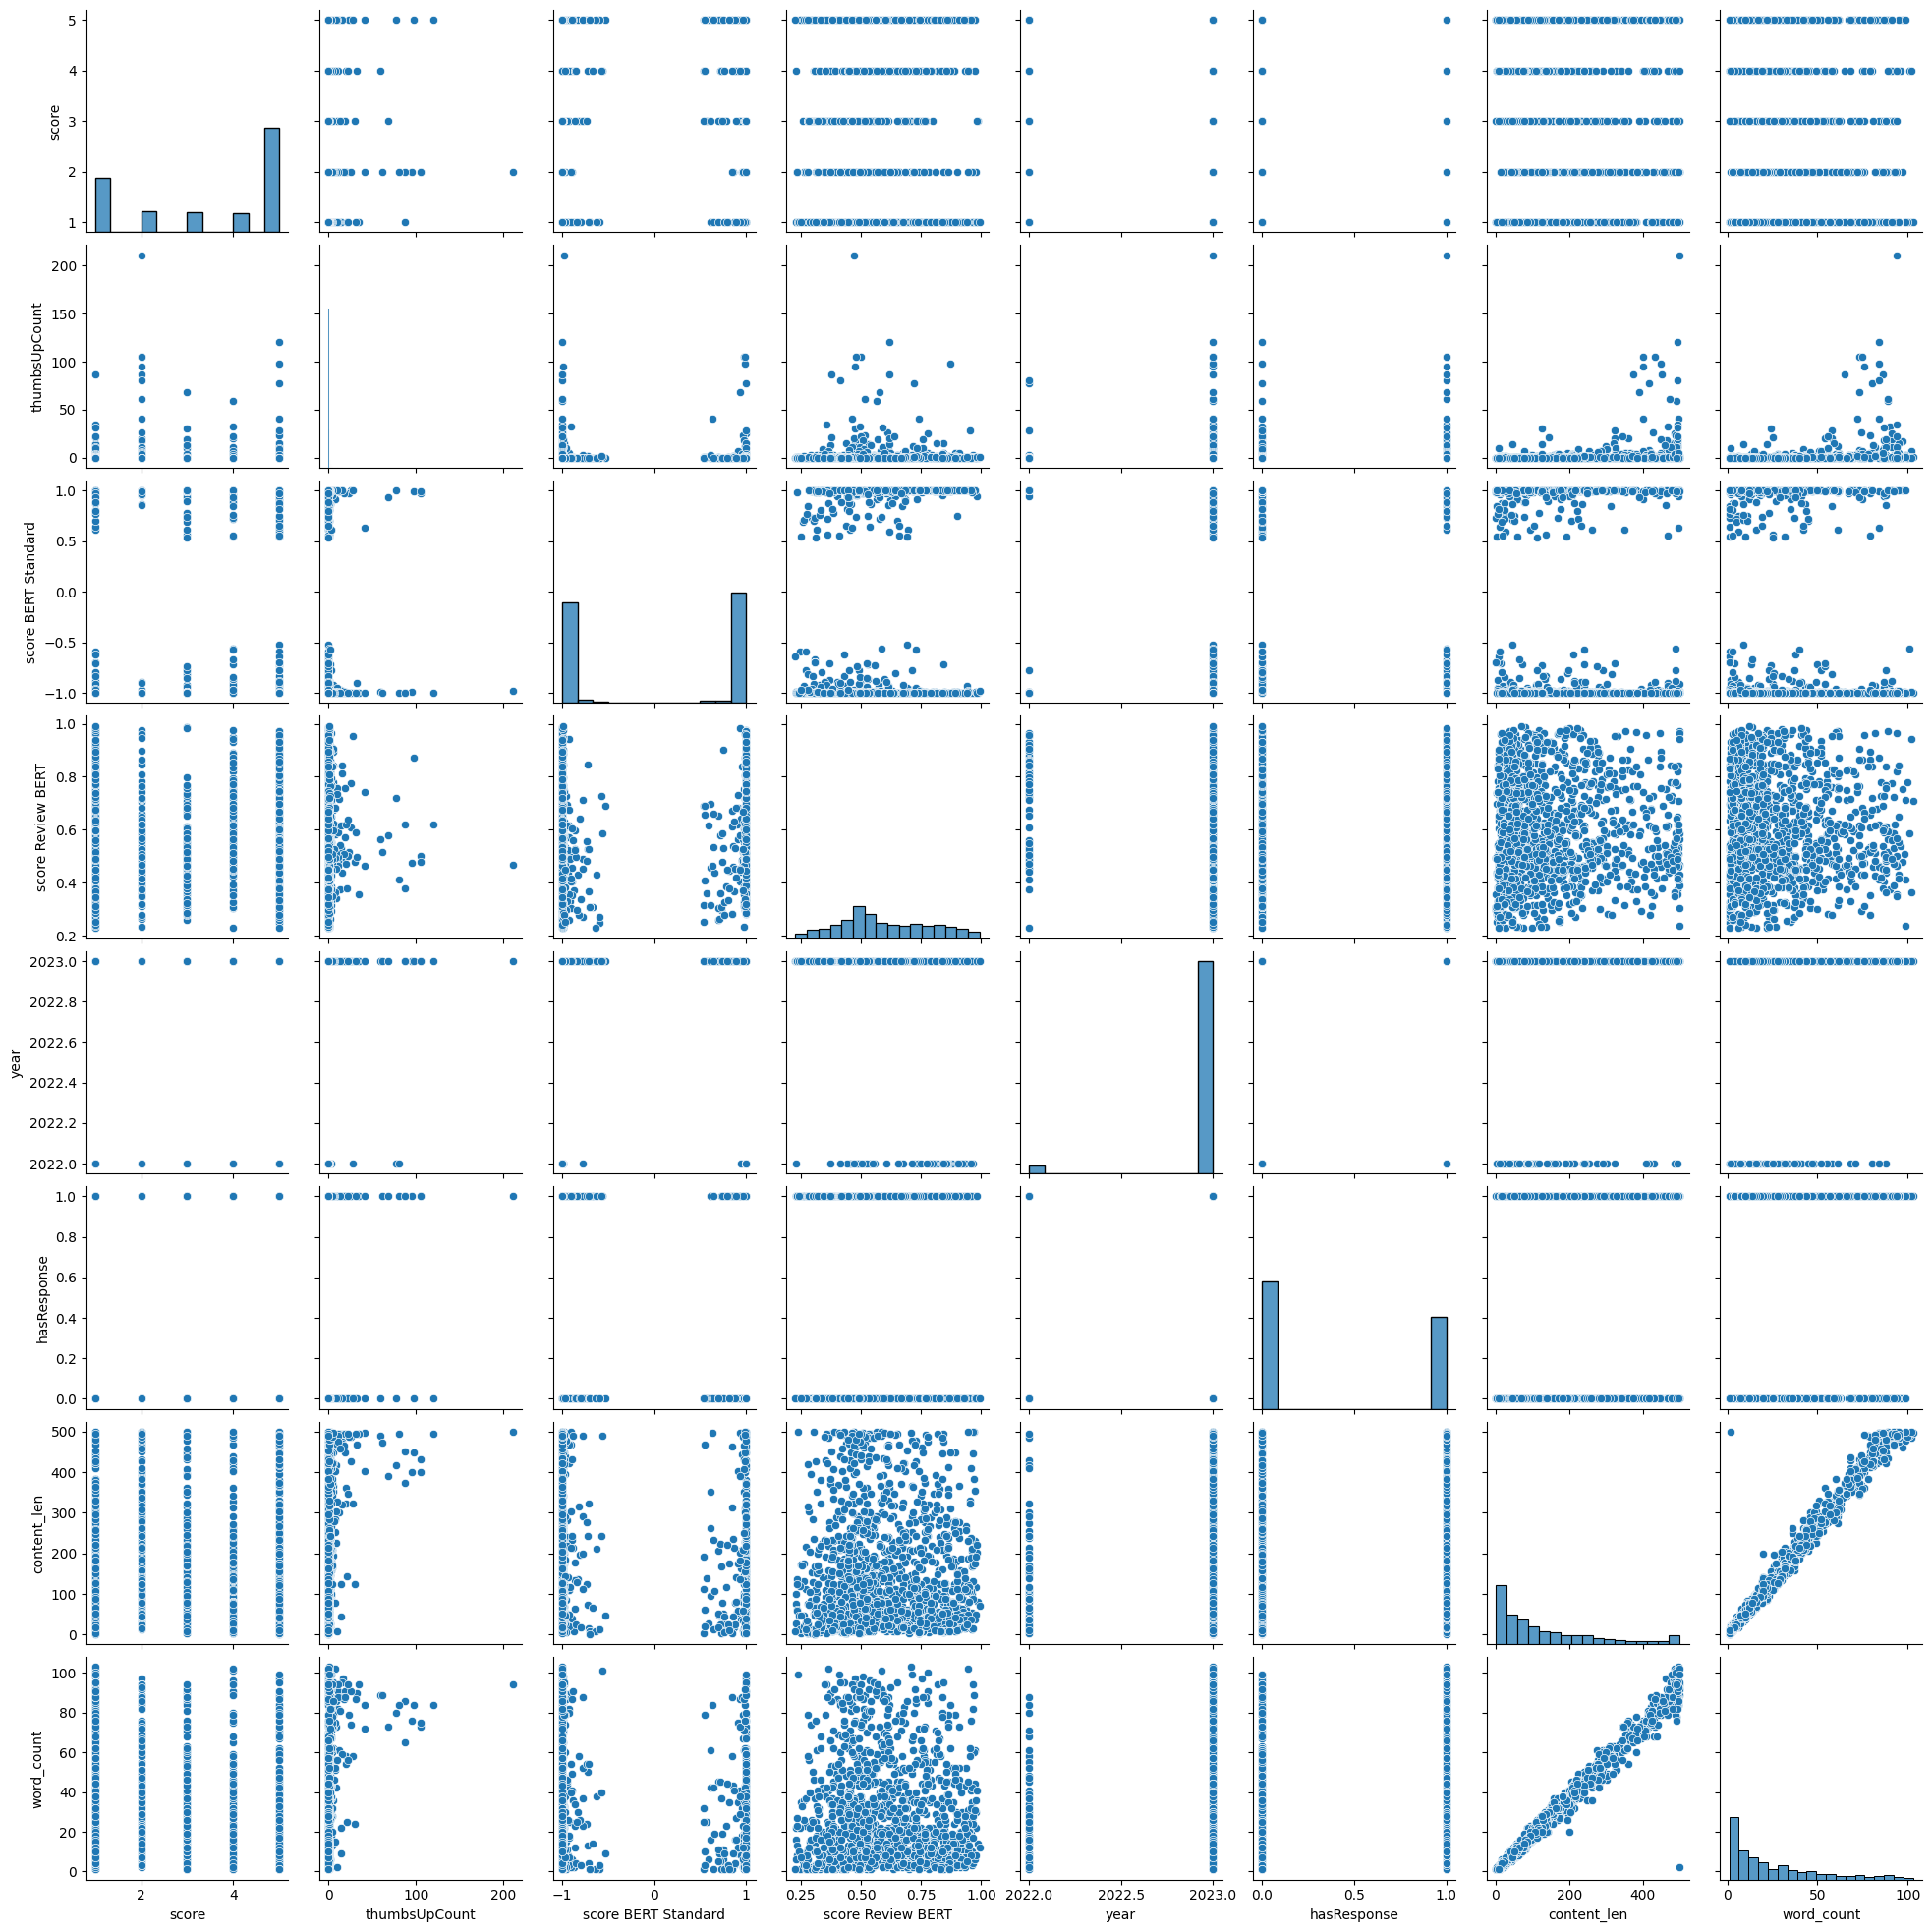

In [ ]:
# Create the default pairplot
sns.pairplot(android)

In [ ]:
androidcorr = android.corr()
#correlation between all Android values
androidcorr

<ipython-input-107-51c9d4641f1f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,score,thumbsUpCount,score BERT Standard,score Review BERT,year,hasResponse,content_len,word_count
score,1.000000,-0.063102,0.721715,0.274615,-0.084378,-0.687276,-0.315274,-0.320272
thumbsUpCount,-0.063102,1.000000,-0.071305,-0.030139,-0.039465,0.072034,0.315946,0.309463
score BERT Standard,0.721715,-0.071305,1.000000,0.317729,-0.050103,-0.566678,-0.377786,-0.376316
score Review BERT,0.274615,-0.030139,0.317729,1.000000,-0.111876,-0.221011,-0.011442,-0.012192
year,-0.084378,-0.039465,-0.050103,-0.111876,1.000000,0.077438,-0.011000,-0.007120
hasResponse,-0.687276,0.072034,-0.566678,-0.221011,0.077438,1.000000,0.309837,0.319288
content_len,-0.315274,0.315946,-0.377786,-0.011442,-0.011000,0.309837,1.000000,0.989533
word_count,-0.320272,0.309463,-0.376316,-0.012192,-0.007120,0.319288,0.989533,1.000000


#Correlation Plots
Drawing correlations among all numeric columns for iOS applications

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.

<__array_function__ internals>:180: RuntimeWarning:

Converting input from bool to <class 'numpy.uint8'> for compatibility.



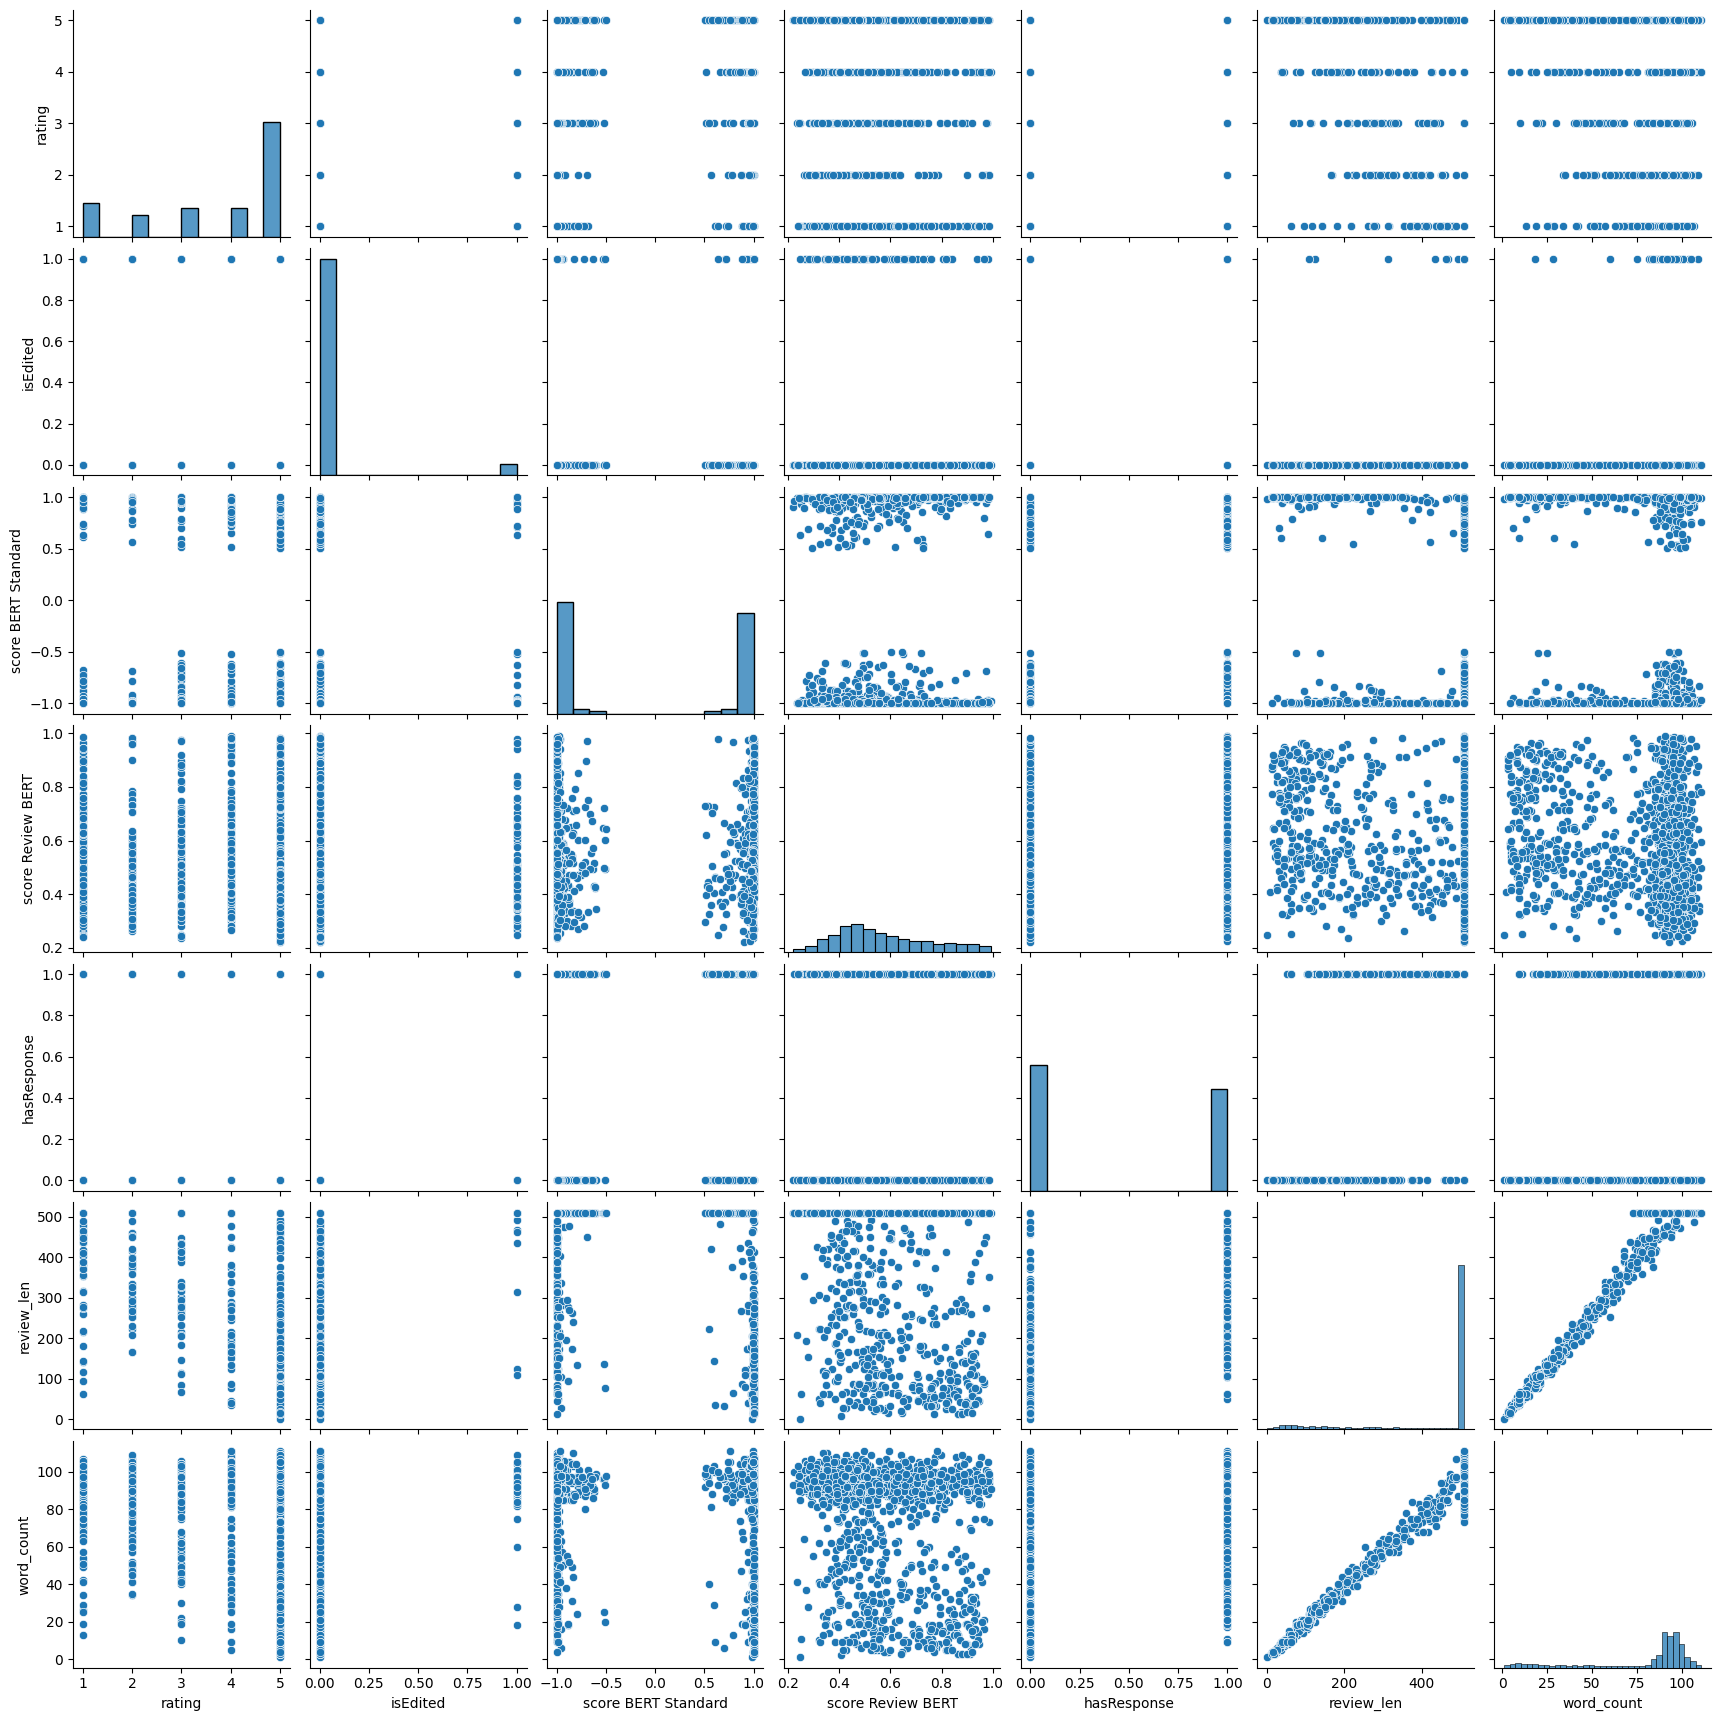

In [ ]:
#creating default pairplot
sns.pairplot(IOS)

In [ ]:
IOScorr = IOS.corr()
IOScorr

<ipython-input-109-ad3fdd2faa70>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,rating,isEdited,score BERT Standard,score Review BERT,hasResponse,review_len,word_count
rating,1.000000,-0.142651,0.571023,0.239840,-0.494394,-0.246830,-0.245891
isEdited,-0.142651,1.000000,-0.088809,-0.054362,0.241162,0.101641,0.091291
score BERT Standard,0.571023,-0.088809,1.000000,0.368766,-0.376273,-0.237133,-0.245344
score Review BERT,0.239840,-0.054362,0.368766,1.000000,-0.149765,-0.213214,-0.218687
hasResponse,-0.494394,0.241162,-0.376273,-0.149765,1.000000,0.202637,0.210174
review_len,-0.246830,0.101641,-0.237133,-0.213214,0.202637,1.000000,0.984183
word_count,-0.245891,0.091291,-0.245344,-0.218687,0.210174,0.984183,1.000000
